In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool

In [ ]:
# fetch dataset
adult = fetch_ucirepo(id=2)
type(adult)

adult.data
# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

df = pd.concat([X, y], axis=1)
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
44513,26,Federal-gov,56419,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,0,0,20,South,<=50K.
17123,46,Private,116666,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
39678,37,Private,190297,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K.
1027,45,Private,368561,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K
37715,39,Self-emp-inc,170502,Masters,14,Divorced,Exec-managerial,Not-in-family,Black,Male,0,0,70,United-States,>50K.


In [ ]:
df.shape

(48842, 15)

In [ ]:
pd.concat((df.nunique(), df.dtypes), axis=1)

,0,1
age,74,int64
workclass,9,object
fnlwgt,28523,int64
education,16,object
education-num,16,int64
marital-status,7,object
occupation,15,object
relationship,6,object
race,5,object
sex,2,object


## Null handling

In [ ]:
df.isnull().sum().sum()

2203

In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-7-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
df.isnull().sum().sum()

0

## Remove duplicates

In [ ]:
df.duplicated().sum()

29

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(48813, 15)

## Data Viz

### Line chart
Proper for showing trends. Usually the x-axis is showing time, date, sequence, .... However it's possible to use it for showing the distribution of discrete numeric (int) data.

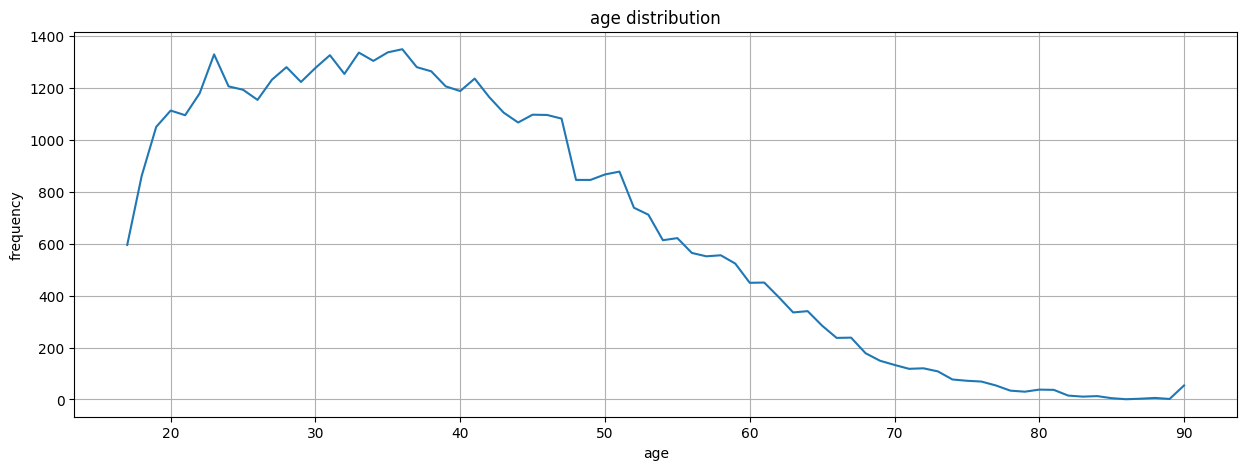

In [ ]:
# line chart for "age"
# pandas plot
age_count = df['age'].value_counts().sort_index()
age_count.plot(kind='line', figsize=(15, 5), grid=True)
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

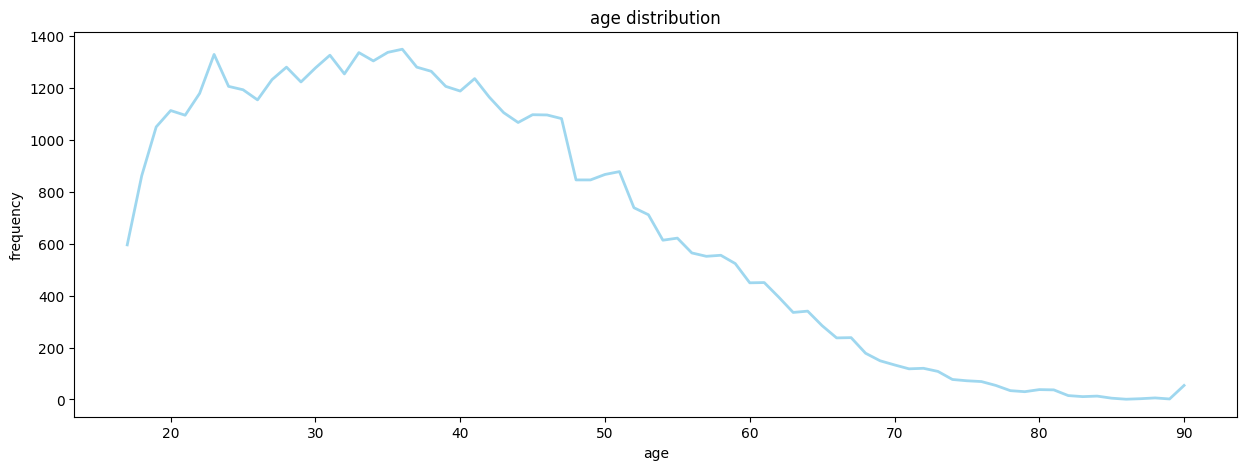

In [ ]:
# age dist --> plt
plt.figure(figsize=(15, 5))
plt.plot(
    age_count,
    c='skyblue',
    lw=2,
    alpha=0.8,

         ) # c --> color
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()


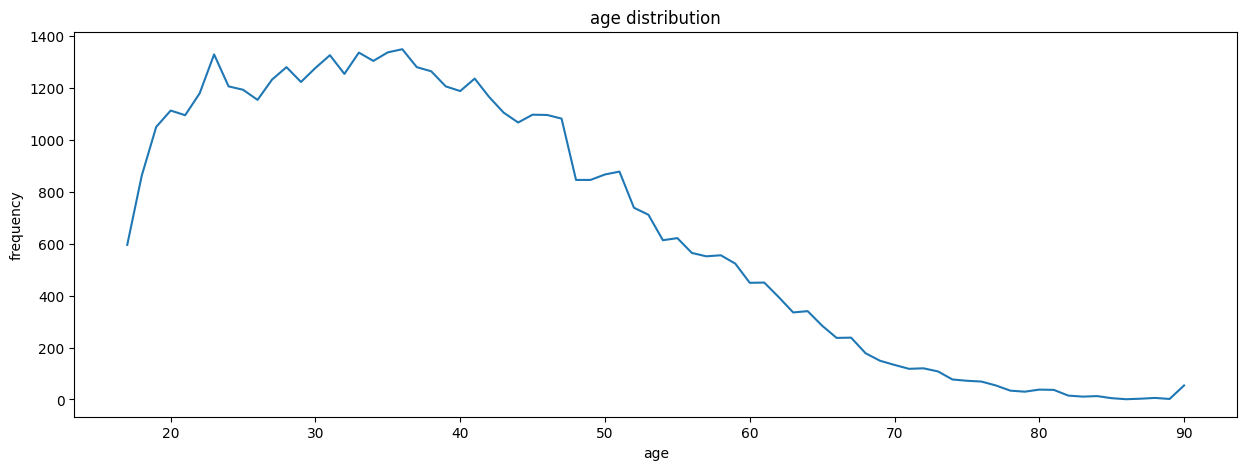

In [ ]:
## age dist --> seaborn
plt.figure(figsize=(15, 5))

sns.lineplot(x=age_count.index, y=age_count.values, data=pd.DataFrame(age_count))
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()


In [ ]:
fig = px.line(age_count, x=age_count.index, y=age_count.values, markers=True)
fig.update_layout(title="age distribution", xaxis_title="age", yaxis_title="frequency")
fig.update_traces(
    hoverinfo='all',
    hovertemplate='<b>Age: </b>%{x} <br><i>frequency: </i>%{y}'
)
fig.show()


In [ ]:
# bokeh
output_notebook()
fig = figure(title="age distribution", x_axis_label="age", y_axis_label="frequency", width=800, height=400)
fig.line(x=age_count.index, y=age_count.values, line_width=2)

hover = HoverTool()
hover.tooltips = [("age", "@x"), ("frequency", "@y")]
fig.add_tools(hover)
show(fig)

### Bar chart


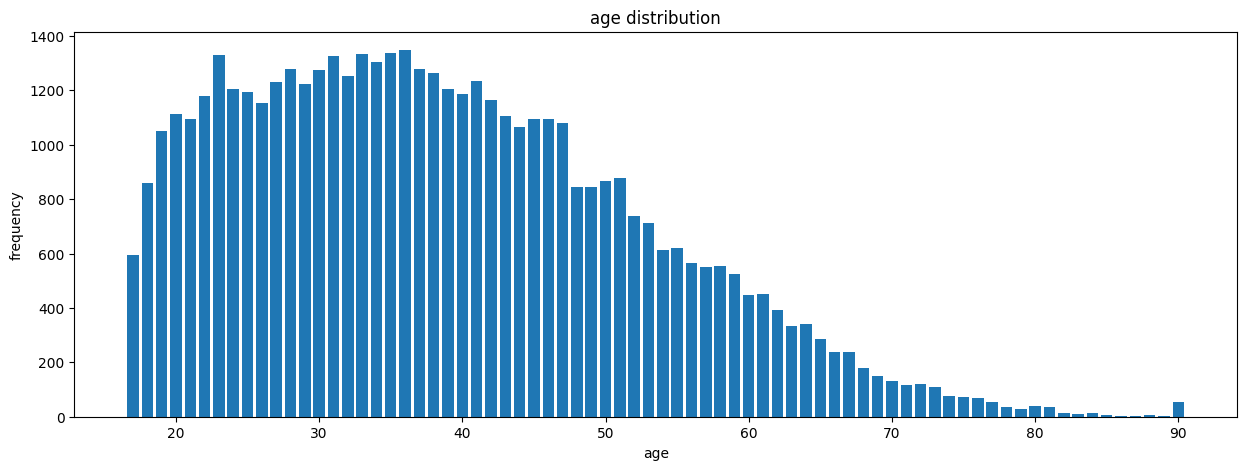

In [ ]:
## age dist. bar chart
plt.figure(figsize=(15, 5))
plt.bar(age_count.index, age_count.values)
#age_count.plot(kind='barh', figsize=(15, 5), grid=True)
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()


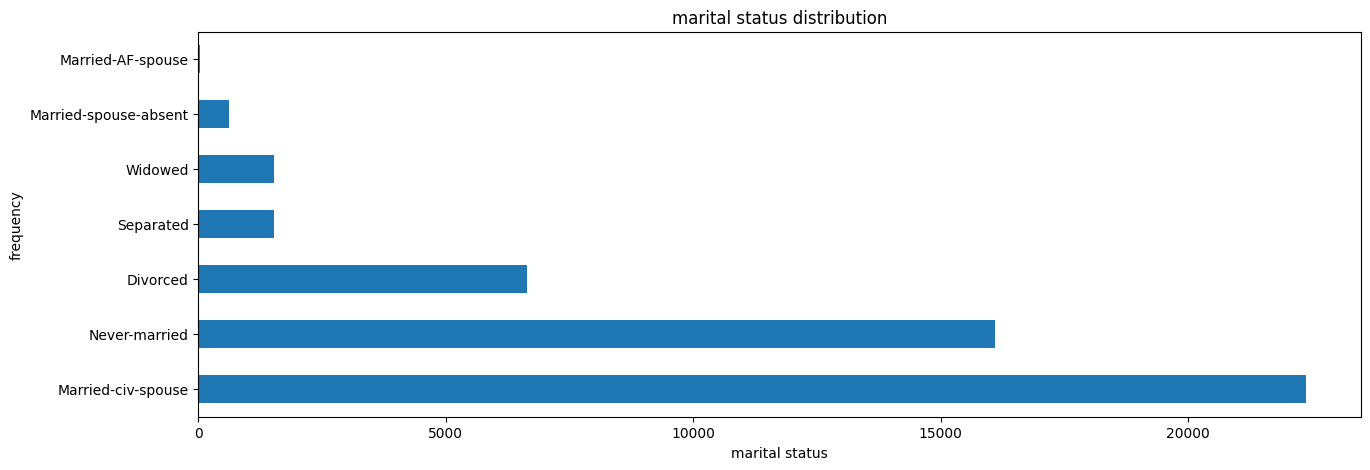

In [ ]:
## bar chart --> marital status
marital_count = df['marital-status'].value_counts()
marital_count.plot(kind='barh', figsize=(15, 5))
plt.title("marital status distribution")
plt.xlabel("marital status")
plt.ylabel("frequency")
plt.show()

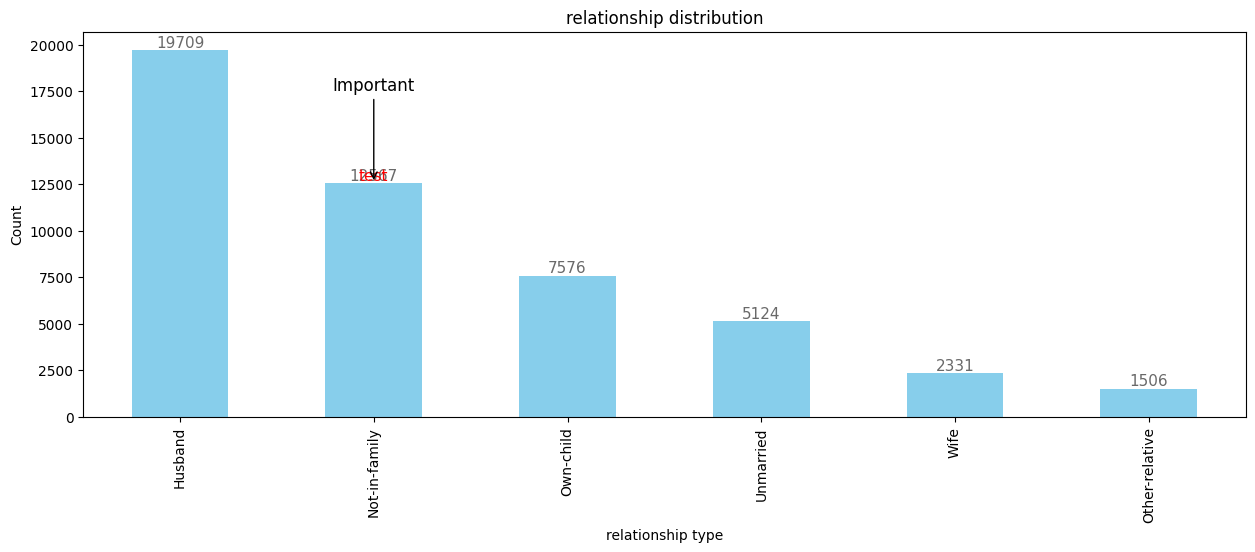

In [ ]:
# Assuming df is your DataFrame
plt.figure(figsize=(15, 5))

relationship_counts = df['relationship'].value_counts()

ax = relationship_counts.plot(kind='bar', color='skyblue')
plt.title('relationship distribution')
plt.xlabel('relationship type')
plt.ylabel('Count')

# Adding text labels above the bars
# Adding text labels above the bars
for idx, i in enumerate(ax.patches):
    # Adding the general text for all bars
    ax.text(
        i.get_x() + i.get_width() / 2.,
        i.get_height() + 0.3,
        str(i.get_height()),
        fontsize=11,
        color='dimgrey',
        ha='center',  # horizontal alignment
        va='bottom',
    )

    # Highlighting the text for the second bar (index 1)
    if idx == 1:
        ax.text(
            i.get_x() + i.get_width() / 2.,
            i.get_height() + 0.8,
            'test',
            fontsize=11,
            color='red',
            ha='center',
           va='bottom',
        )


# Adding an arrow pointing to the second bar (index 1)
ax.annotate(
    'Important',  # The text to display near the arrow
    xy=(ax.patches[1].get_x() + ax.patches[1].get_width() / 2, ax.patches[1].get_height()),  # Arrow tip position (the top of the second bar)
    xytext=(ax.patches[1].get_x() + ax.patches[1].get_width() / 2, ax.patches[1].get_height() + 5000),  # Text position (above the bar)
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    ha='center',  # Center alignment
    fontsize=12,
    color='black'
)

plt.show()


### Histogram

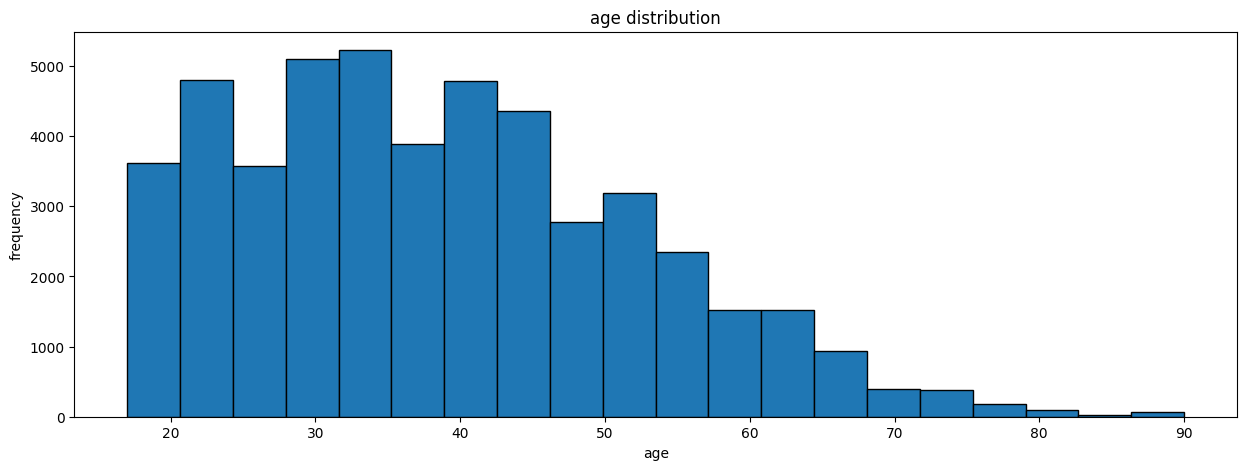

In [ ]:
## Hist.
plt.figure(figsize=(15, 5))

plt.hist(df['age'], bins=20, edgecolor='black')
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

### Pie chart

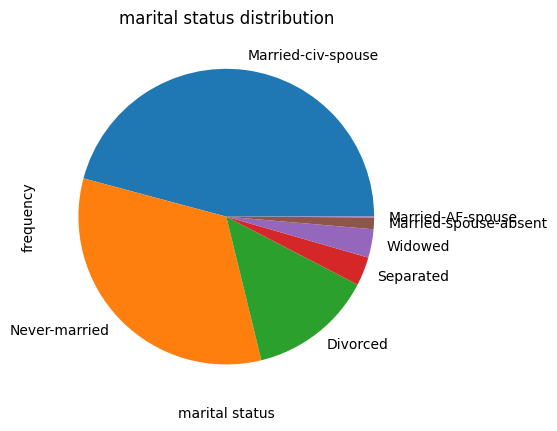

In [ ]:
## pie chart
marital_count.plot(kind='pie')
plt.title("marital status distribution")
plt.xlabel("marital status")
plt.ylabel("frequency")
plt.show()

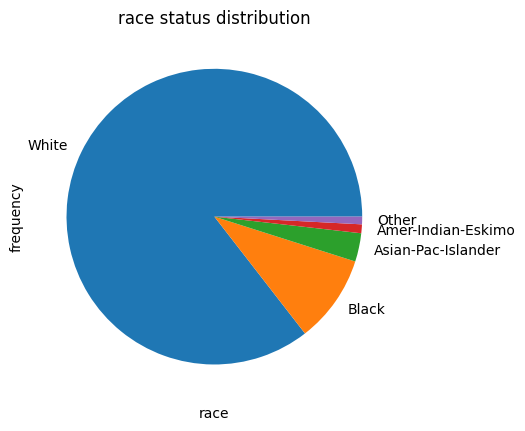

In [ ]:
## not recommended
race_count = df['race'].value_counts()
race_count.plot(kind='pie')
plt.title("race status distribution")
plt.xlabel("race")
plt.ylabel("frequency")
plt.show()

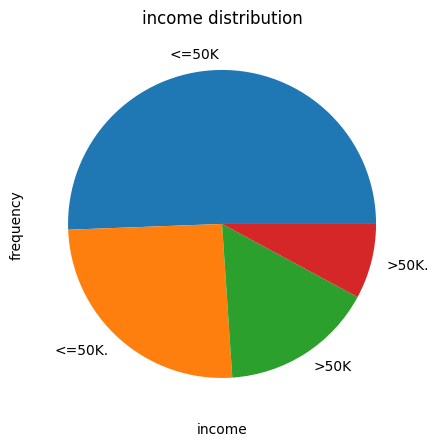

In [ ]:
income_count = df['income'].value_counts()
income_count.plot(kind='pie', figsize=(15, 5))
plt.title("income distribution")
plt.xlabel("income")
plt.ylabel("frequency")
plt.show()

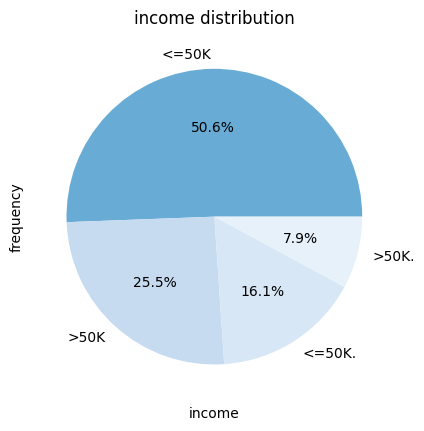

In [ ]:
import numpy as np
cmap = plt.get_cmap('Blues')
portion_list = np.round(df['income'].value_counts().values / df['income'].value_counts().sum(), 2)
colors = cmap(portion_list)

income_count.plot(kind='pie', colors=colors, labels=df['income'].unique(), autopct='%1.1f%%')
plt.title("income distribution")
plt.xlabel("income")
plt.ylabel("frequency")
plt.show()

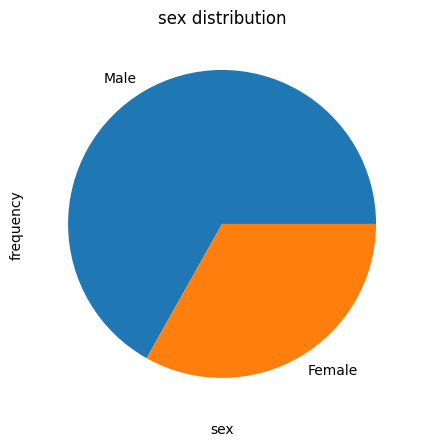

In [ ]:
sex_count = df['sex'].value_counts()
sex_count.plot(kind='pie', figsize=(15, 5))
plt.title("sex distribution")
plt.xlabel("sex")
plt.ylabel("frequency")
plt.show()